# Análise de Gastos com Viagens Públicas
Este notebook realiza a análise de dados públicos de viagens, com base no arquivo `viagens.csv`. O processo inclui limpeza, transformação e visualização dos dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")

# Leitura do CSV
df = pd.read_csv('viagens.csv', sep=';', encoding='utf-8', low_memory=False)
df.columns = df.columns.str.strip()
df.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Viagem Urgente,Situação,Órgão Superior Solicitante,Órgão / Entidade Vinculada Solicitante,Tipo Viagem,CPF,Nome,Início do Afastamento,Fim do Afastamento,Destinos,Valor Total,Unnamed: 13
0,20692377,000094/25,Sim,Realizada,Ministério dos Povos Indígenas,Fundação Nacional do Índio,Nacional,NaN,ANTONIO GOMES DA SILVA,01/01/2025,20/01/2025,Senador José Porfírio/PA,"R$ 6.532,50",NaN
1,20692210,000089/25,Sim,Realizada,Ministério dos Povos Indígenas,Fundação Nacional do Índio,Nacional,***.494.573-**,ALMERINDA CORDEIRO GOMES,01/01/2025,24/01/2025,São João do Caru/MA,"R$ 7.099,85",NaN
2,20697043,000147/25,Sim,Realizada,Ministério dos Povos Indígenas,Fundação Nacional do Índio,Nacional,***.357.492-**,SALES GOMES DE OLIVEIRA,01/01/2025,24/01/2025,Cotriguaçu/MT,"R$ 7.099,85",NaN
3,20684241,000231/25-3C,Sim,Realizada,Ministério da Justiça e Segurança Pública,Ministério da Justiça e Segurança Pública - Un...,Nacional,***.124.631-**,ELIELTON GOMES BASTOS,01/01/2025,21/02/2025,"Planalto/RS, Sananduva/RS, Planalto/RS","R$ 18.772,74",NaN
4,20680392,000860/25-3C,Sim,Realizada,Ministério da Justiça e Segurança Pública,Ministério da Justiça e Segurança Pública - Un...,Nacional,***.103.354-**,ELDER PATRICIO OLIVEIRA GOMES,01/01/2025,24/02/2025,"Rio de Janeiro/RJ, Rio de Janeiro/RJ","R$ 20.681,85",NaN


In [2]:
# Ver nomes das colunas
df.columns.tolist()

['Identificador do processo de viagem',
 'Número da Proposta (PCDP)',
 'Viagem Urgente',
 'Situação',
 'Órgão Superior Solicitante',
 'Órgão / Entidade Vinculada Solicitante',
 'Tipo Viagem',
 'CPF',
 'Nome',
 'Início do Afastamento',
 'Fim do Afastamento',
 'Destinos',
 'Valor Total',
 'Unnamed: 13']

In [3]:
# Conversão de datas
df['Início do Afastamento'] = pd.to_datetime(df['Início do Afastamento'], dayfirst=True, errors='coerce')
df['AnoMes'] = df['Início do Afastamento'].dt.to_period('M').astype(str)
df[['Início do Afastamento', 'AnoMes']].head()

,Início do Afastamento,AnoMes
0,2025-01-01,2025-01
1,2025-01-01,2025-01
2,2025-01-01,2025-01
3,2025-01-01,2025-01
4,2025-01-01,2025-01


In [4]:
# Conversão da coluna de valores monetários
df['Valor Total'] = df['Valor Total'].astype(str).str.replace('R$', '', regex=False)
df['Valor Total'] = df['Valor Total'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.strip()
df['Valor Total'] = pd.to_numeric(df['Valor Total'], errors='coerce')
df['Valor Total'].describe()

count      754.000000
mean      2157.147082
std       2512.949995
min          0.000000
25%        411.600000
50%       1244.065000
75%       2992.962500
max      20681.850000
Name: Valor Total, dtype: float64

In [5]:
# Gastos mensais
gastos_mensais = df.groupby('AnoMes')['Valor Total'].sum().sort_index()
gastos_mensais.head()

AnoMes
2025-01    886398.18
2025-02    740090.72
Name: Valor Total, dtype: float64

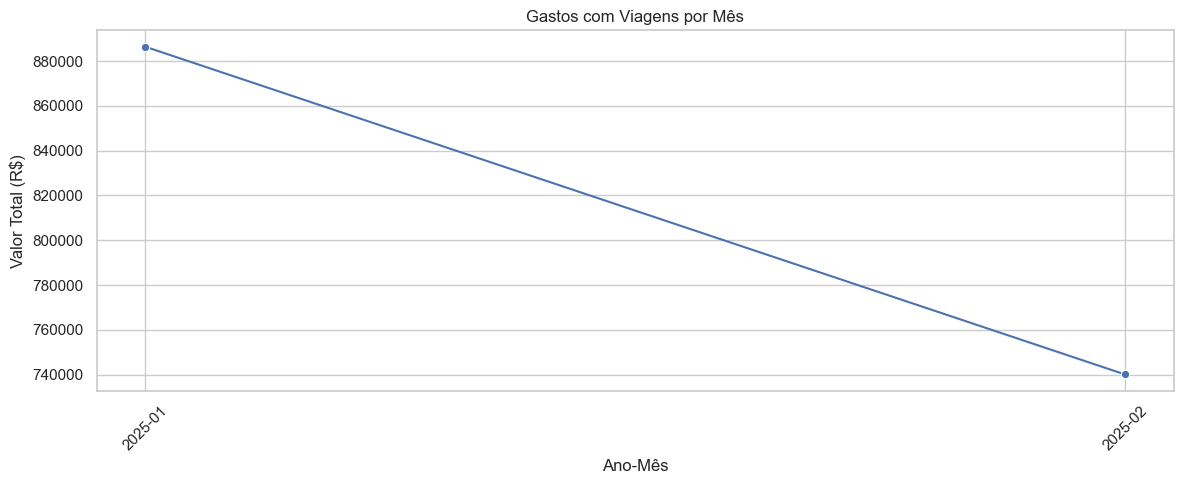

In [6]:
# Gráfico de linha
plt.figure(figsize=(12, 5))
sns.lineplot(x=gastos_mensais.index, y=gastos_mensais.values, marker='o')
plt.title('Gastos com Viagens por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gráfico: Top 10 Órgãos por Gastos com Viagens

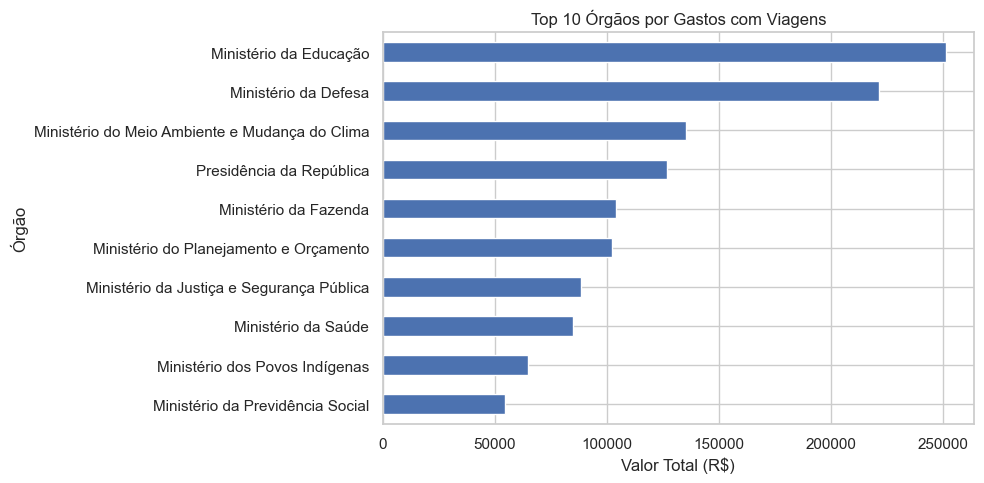

In [7]:

import matplotlib.pyplot as plt

top_orgaos = df.groupby('Órgão Superior Solicitante')['Valor Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_orgaos.plot(kind='barh', title='Top 10 Órgãos por Gastos com Viagens')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Órgão')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Gráfico: Top 10 Cidades por Gastos com Viagens

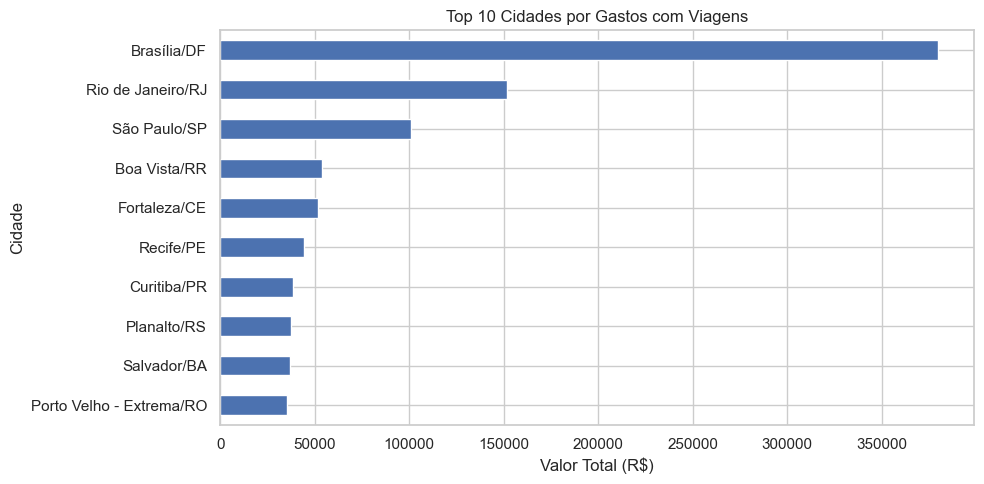

In [8]:

df_cidades = df.copy()
df_cidades['Destinos'] = df_cidades['Destinos'].astype(str)
df_cidades = df_cidades.assign(Cidade=df_cidades['Destinos'].str.split(',')).explode('Cidade')
df_cidades['Cidade'] = df_cidades['Cidade'].str.strip()

top_cidades = df_cidades.groupby('Cidade')['Valor Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_cidades.plot(kind='barh', title='Top 10 Cidades por Gastos com Viagens')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Cidade')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
